In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_pickle("dfnew.pkl")

In [3]:
df.shape

(2249711, 23)

In [4]:
df = shuffle(df)

In [5]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport
2248319,2017-01-25 20:02:30,2017-01-25 20:20:25,1,223,145,1,4.1,15.5,0.5,0.5,...,16.80,2,1.0,17.916667,1,2,16.80,0,20,0
2169059,2017-01-14 12:02:44,2017-01-14 12:04:03,1,116,116,1,0.1,3.0,0.0,0.5,...,4.55,1,1.0,1.316667,1,5,4.55,0,12,0
741015,2017-08-15 13:53:34,2017-08-15 14:00:08,1,25,45,1,2.0,8.5,0.0,0.5,...,9.30,2,1.0,6.566667,8,1,9.30,0,13,0
685878,2017-08-25 19:44:28,2017-08-25 19:46:58,1,75,236,1,0.6,4.0,1.0,0.5,...,6.95,1,1.0,2.500000,8,4,6.95,0,19,0
1579152,2017-04-08 02:00:22,2017-04-08 02:12:28,1,256,79,1,2.9,11.5,0.5,0.5,...,12.80,1,1.0,12.100000,4,5,12.80,0,2,0


In [6]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['new_date_column'] = df['lpep_pickup_datetime'].dt.date

In [7]:
df['trip_count'] = 1

In [8]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport,new_date_column,trip_count
2248319,2017-01-25 20:02:30,2017-01-25 20:20:25,1,223,145,1,4.1,15.5,0.5,0.5,...,1.0,17.916667,1,2,16.80,0,20,0,2017-01-25,1
2169059,2017-01-14 12:02:44,2017-01-14 12:04:03,1,116,116,1,0.1,3.0,0.0,0.5,...,1.0,1.316667,1,5,4.55,0,12,0,2017-01-14,1
741015,2017-08-15 13:53:34,2017-08-15 14:00:08,1,25,45,1,2.0,8.5,0.0,0.5,...,1.0,6.566667,8,1,9.30,0,13,0,2017-08-15,1
685878,2017-08-25 19:44:28,2017-08-25 19:46:58,1,75,236,1,0.6,4.0,1.0,0.5,...,1.0,2.500000,8,4,6.95,0,19,0,2017-08-25,1
1579152,2017-04-08 02:00:22,2017-04-08 02:12:28,1,256,79,1,2.9,11.5,0.5,0.5,...,1.0,12.100000,4,5,12.80,0,2,0,2017-04-08,1


In [9]:
df_1 = df[['day','month','trip_count','new_date_column','trip_distance']]

In [10]:
df_1.shape

(2249711, 5)

In [11]:
df_1.head()

,day,month,trip_count,new_date_column,trip_distance
2248319,2,1,1,2017-01-25,4.1
2169059,5,1,1,2017-01-14,0.1
741015,1,8,1,2017-08-15,2.0
685878,4,8,1,2017-08-25,0.6
1579152,5,4,1,2017-04-08,2.9


In [12]:
total_trip = (df_1.groupby(['new_date_column','day','month'])["trip_count","trip_distance"].sum().reset_index())

In [13]:
total_trip.head()

,new_date_column,day,month,trip_count,trip_distance
0,2017-01-01,6,1,7836,24771.4
1,2017-01-02,0,1,4986,12880.2
2,2017-01-03,1,1,6190,15182.4
3,2017-01-04,2,1,6582,16093.1
4,2017-01-05,3,1,6943,17015.5


In [14]:
total_trip.shape

(365, 5)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
decision = total_trip[['trip_count']]
features = total_trip[['day', 'month', 'trip_distance']]
train = total_trip[total_trip['month']!=12][['day','month','trip_distance']]
train_d = total_trip[total_trip['month']!=12][['trip_count']]
test = total_trip[total_trip['month']==12][['day','month','trip_distance']]
test_d = total_trip[total_trip['month']==12][['trip_count']]

In [16]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
rfr = RF.fit(train, train_d.values.ravel())

In [17]:
test_rfr = RF.predict(test)
test_rfr #forecasting trip_amount

array([5848.7, 6415.2, 5090.4, 4609.9, 5009. , 5097.5, 4765.6, 5809.5,
       5646. , 4838.3, 4675.5, 5080.7, 5102.9, 5149.4, 5433.7, 6105.5,
       4917.8, 5049.8, 5064.7, 5106.4, 5406. , 5604.6, 4705.2, 4121.5,
       3779.1, 3779.1, 3977. , 4109.2, 4576.4, 4074.6, 4957.5])

In [18]:
test_d # trip_amount

,trip_count
334,6181
335,6403
336,5015
337,4559
338,5157
339,5150
340,5247
341,6090
342,5697
343,4608


Text(0,0.5,'trip_count')

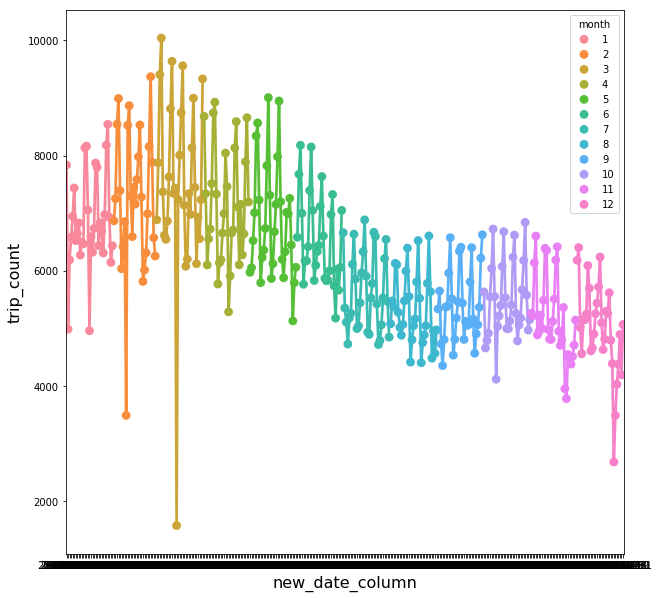

In [19]:
plt.figure(figsize=(10,10))
sns.pointplot(x='new_date_column',y='trip_count',data=total_trip,kind='point',hue='month')
plt.xlabel('new_date_column',fontsize=16)
plt.ylabel('trip_count',fontsize=16)

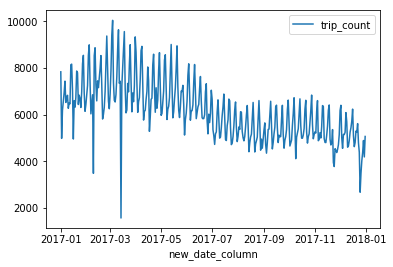

In [21]:
lines = total_trip.plot.line(x='new_date_column', y='trip_count')

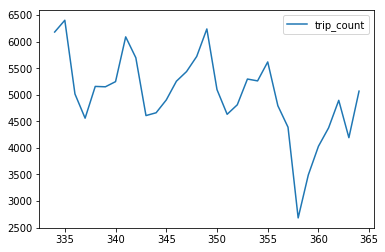

In [22]:
lines = test_d.plot.line()

In [23]:
test_d['trip_count']=test_rfr

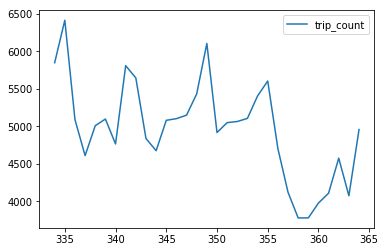

In [24]:
lines = test_d.plot.line()